In [26]:
import pandas as pd
import numpy as np

# Carregar o dataset
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/titanic.csv'
df = pd.read_csv(url, header = 0)

# Visualizar as primeiras linhas
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Series
idades = pd.Series([22, 35, 58], name='idade')
print(idades)

# DataFrame
dados = { 
    'nome': ['Joao', 'Maria', 'Pedro'],
    'idade': [22, 35, 58],
    'cidade': ['SP', 'RJ', 'MG']
}
df1 = pd.DataFrame(dados) # perceba como podemos criar DataFrames a partir de dicionarios
print(df1)

0    22
1    35
2    58
Name: idade, dtype: int64
    nome  idade cidade
0   Joao     22     SP
1  Maria     35     RJ
2  Pedro     58     MG


In [6]:
# Informacoes gerais
print(df.info())

# Estatisticas descritivas
print(df.describe())

# Dimensoes
print(df.shape)  # (linhas, colunas)

# Tipos de dados
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [10]:
print("Total de passageiros:", len(df))
print("\nSobreviventes:", df['Survived'].sum())
print("Taxa de sobrevivencia:", 
      round(df['Survived'].mean() * 100, 2), "%")

# Analise por classe
print("\nTaxa de sobrevivencia por classe (%):")
print(df.groupby('Pclass')['Survived']
        .mean()
        .round(3) * 100)

Total de passageiros: 891

Sobreviventes: 342
Taxa de sobrevivencia: 38.38 %

Taxa de sobrevivencia por classe (%):
Pclass
1    63.0
2    47.3
3    24.2
Name: Survived, dtype: float64


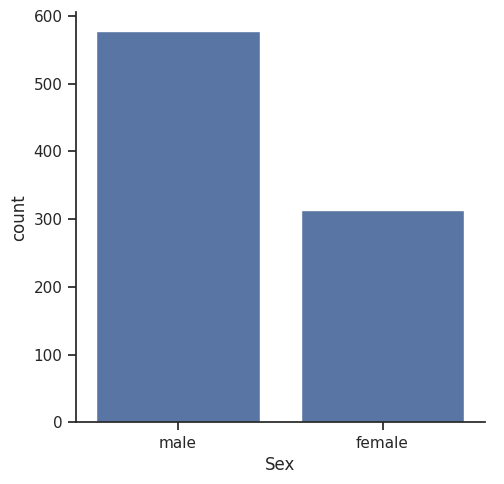

In [11]:
import seaborn as sns # Biblioteca

sns.set(style="ticks")
sns.catplot(x='Sex', data=df, kind='count')

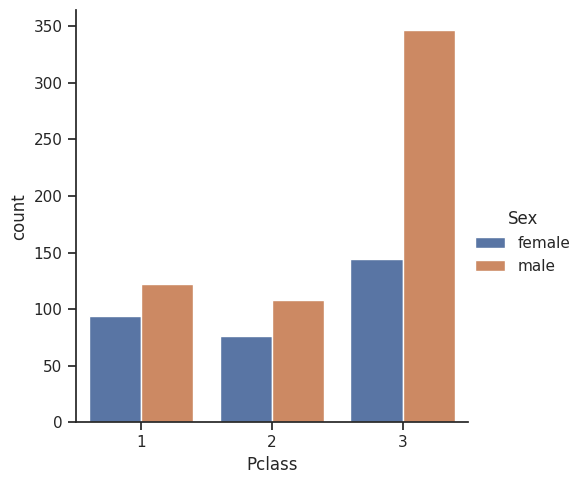

In [12]:
sns.catplot(x='Pclass', data=df, hue='Sex', kind='count')
# hue: Basicamente define as cores, a "legenda" do grafico

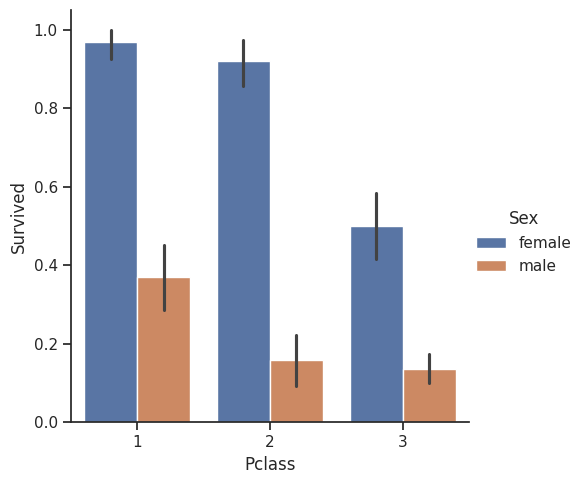

In [13]:
sns.catplot(x='Pclass', y='Survived', data=df, hue='Sex', kind='bar')

In [27]:
# Child = menos de 16 anos
# Elder = maior de 60 anos

df['Person'] = df.Sex # Nova coluna
df.loc[df['Age'] < 16, 'Person'] = 'child'
df.loc[df['Age'] > 60, 'Person'] = 'elder'

# Checando a distribuicao
print(f"Categora de Person : {df.Person.unique()}\n=================================")
print(f"Distribuicao de Person : {df.Person.value_counts()}\n=================================")
print(f"Media da idade : {df.Age.mean()}\n=================================")

Categora de Person : ['male' 'female' 'child' 'elder']
Distribuicao de Person : Person
male      518
female    268
child      83
elder      22
Name: count, dtype: int64
Media da idade : 29.69911764705882


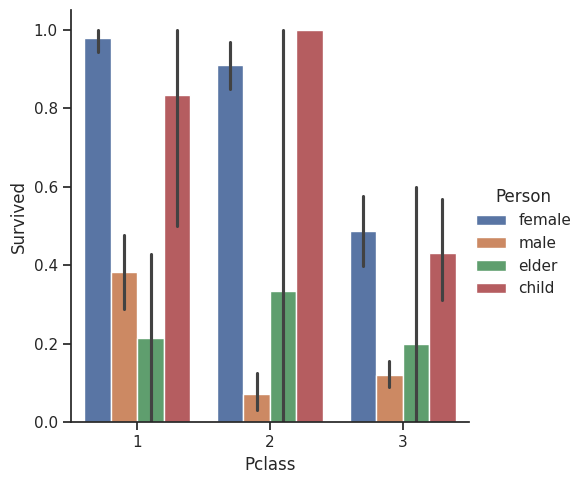

In [15]:
sns.catplot(x='Pclass', y='Survived', data=df, hue='Person', kind='bar')

In [28]:
# Selecionar colunas
nomes = df['Name']
info_basica = df[['Name', 'Age', 'Sex']]

# Filtrar linhas
sobreviventes = df[df['Survived'] == 1]
primeira_classe = df[df['Pclass'] == 1]

# Condicoes multiplas
mulheres_1classe = df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]

# Selecao por indice
primeiros_10 = df.iloc[0:10]  # Por posicao
passageiro_23 = df.loc[23]    # Por rotulo

In [29]:
mulheres_1classe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,female
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,female


In [19]:
# Verificar valores ausentes
print(df.isna().sum())

# Remover linhas com valores ausentes
df_clean = df.dropna()

# Preencher valores ausentes
df['Age'] = df['Age'].fillna(df['Age'].mean())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64


In [23]:
sob = df.groupby('Survived')

# Contagem
contagem_genero = df['Sex'].value_counts()
print(contagem_genero)

# Tabela cruzada
pd.crosstab(df['Pclass'], df['Survived'])

Sex
male      577
female    314
Name: count, dtype: int64


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [24]:
# Modificar valores
df['Sexo'] = df['Sex'].map({'male': 'M', 'female': 'F'})

# Aplicar funcao
def titulo(nome):
    return nome.split(',')[1].split('.')[0].strip()
df['Titulo'] = df['Name'].apply(titulo)

# Essas novas colunas não foram levadas em conta nos códigos seguintes

In [31]:
# Ordenar por uma coluna
df_ordenado = df.sort_values('Age')

# Ordenar por multiplas colunas
df_ordenado = df.sort_values(['Pclass', 'Age'], 
                           ascending=[True, False])

In [ ]:
# EXEMPLO
# Concatenar DataFrames
df_completo = pd.concat([df1, df2])

# Merge de DataFrames - mesclar os DataFrames
df_merged = pd.merge(df1, df2, 
                    on='passenger_id', 
                    how='left')

In [35]:
# Estatisticas de sobrevivencia por genero e classe
print(df.groupby(['Sex', 'Pclass'])['Survived']
        .mean()
        .unstack()
        .round(3) * 100)

# Distribuicao de idades
print("\nEstatisticas de idade:")
print(df['Age'].describe())

# Preco medio por classe
print("\nPreco medio por classe:")
print(df.groupby('Pclass')['Fare']
        .mean()
        .round(2))

# Correlacoes
correlacoes = df[['Survived', 'Pclass', 'Age', 'Fare']]
print("\nCorrelacoes:")
print(correlacoes.corr().round(3))

Pclass     1     2     3
Sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5

Estatisticas de idade:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Preco medio por classe:
Pclass
1    84.15
2    20.66
3    13.68
Name: Fare, dtype: float64

Correlacoes:
          Survived  Pclass    Age   Fare
Survived     1.000  -0.338 -0.077  0.257
Pclass      -0.338   1.000 -0.369 -0.549
Age         -0.077  -0.369  1.000  0.096
Fare         0.257  -0.549  0.096  1.000
